# 神经网络的学习
本章的主题是神经网络的学习。这里所说的“学习”是指从训练数据中自动获取最优权重参数的过程。本章中，为了使神经网络能进行学习，将导入损失函数这一指标。而学习的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数。为了找出尽可能小的损失函数的值，本章我们将介绍利用了函数斜率的梯度法。
> 对于线性可分问题，第 2章的感知机是可以利用数据自动学习的。根据“感知机收敛定理”，通过有限次数的学习，线性可分问题是可解的。但是，非线性可分问题则无法通过（自动）学习来解决。

## 从数据中学习
神经网络的特征就是可以从数据中学习。所谓“从数据中学习”，是指可以由数据自动决定权重参数的值。
> 对于线性可分问题，第2章的感知机是可以利用数据自动学习的。根据“感知机收敛定理”，通过有限次数的学习，线性可分问题是可解的。但是，非线性可分问题则无法通过（自动）学习来解决。
> 深度学习有时也称为端到端机器学习（end-to-end machine learning）。这里所说的端到端是指从一端到另一端的意思，也就是从原始数据（输入）中获得目标结果（输出）的意思。
> 机器学习的方法中，将图像转换为向量时使用的特征量仍是由人设计的。对于不同的问题，必须使用合适的特征量（必须设计专门的特征量）.
> 神经网络的优点是对所有的问题都可以用同样的流程来解决。

![图4-2](./picture/4_2.jpg)

机器学习中，一般将数据分为**训练数据和测试数据**两部分来进行学习和实验等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以称为**监督数据**。
**泛化能力**是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的最终目标。
仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。顺便说一下，只对某个数据集过度拟合的状态称为**过拟合（over fitting）**。避免过拟合也是机器学习的一个重要课题。

## 损失函数
神经网络的学习通过某个指标表示现在的状态。然后，以这个指标为基准，寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 均方误差
$$
E=\frac{1}{2} \sum_k\left(y_k-t_k\right)^2
$$
这里，y_k$ 是神经网络的输出, $t_k$ 表示监督数据，$k$表示数据的维数。

In [1]:
import numpy as np
import matplotlib.pylab as plt


def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

### 交叉熵误差
$$
E=-\sum_k t_k \log y_k
$$
这里, $\log$ 表示以 $\mathrm{e}$ 为底数的自然对数 $\left(\log _{\mathrm{e}}\right) 。 y_k$ 是神经网络的输出, $t_k$ 是 正确解标签。并且, $t_k$ 中只有正确解标签的索引为 1 , 其他均为 0 (one-hot 表示)。

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

### mini-batch学习
如果遇到大数据，数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函数是不现实的。因此，我们从全部数据中选出一部分，作为全部数据的“近似”。神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。

### 为何要设定损失函数
在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值。
之所以不能用识别精度作为指标，是因为这样一来绝大多数地方的导数都会变为0，导致参数无法更新。
> 识别精度对微小的参数变化基本上没有什么反应，即便有反应，它的值也是不连续地、突然地变化。出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。

## 数值微分
> 为了减小这个误差，我们可以计算函数f在(x + h)和(x − h)之间的差分。因为这种计算方法以x为中心，计算它左右两边的差分，所以也称为中心差分（而(x + h)和x之间的差分称为前向差分）。
> 利用微小的差分求导数的过程称为数值微分（numerical differentiation）。而基于数学式的推导求导数的过程，则用“解析性”（analytic）一词，称为“解析性求解”或者“解析性求导”。解析性求导得到的导数是不含误差的“真的导数”。

### 示例

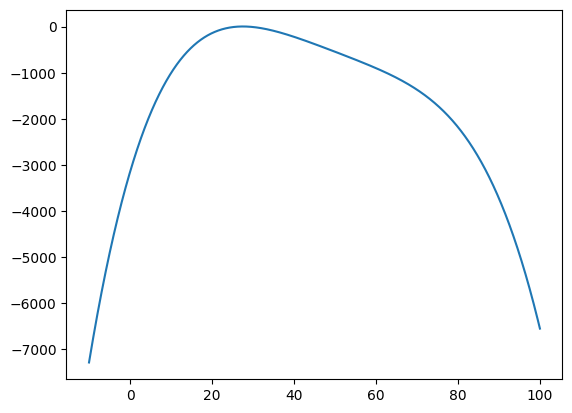

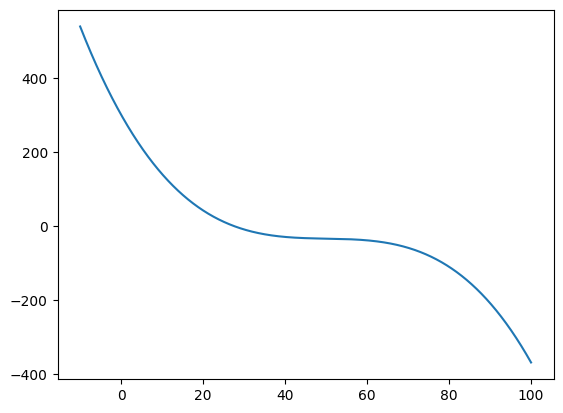

In [3]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

def function_1(x):
    return -0.00065*x*x*x*x+0.13*x*x*x-9.85*x*x+301*x-3156

x = np.arange(-10, 100, 0.01)

y = function_1(x)
plt.plot(x, y)
plt.show()

y = numerical_diff(function_1, x)
plt.plot(x, y)
plt.show()

## 梯度
- 一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。而通过巧妙地使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是梯度法。
- 梯度表示的是各点处的函数值减小最多的方向。因此，无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。
- 函数的极小值、最小值以及被称为鞍点（saddle point）的地方，梯度为 0。极小值是局部最小值，也就是限定在某个范围内的最小值。鞍点是从某个方向上看是极大值，从另一个方向上看则是极小值的点。虽然梯度法是要寻找梯度为 0的地方，但是那个地方不一定就是最小值（也有可能是极小值或者鞍点）。此外，当函数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，陷入被称为“学习高原”的无法前进的停滞期。

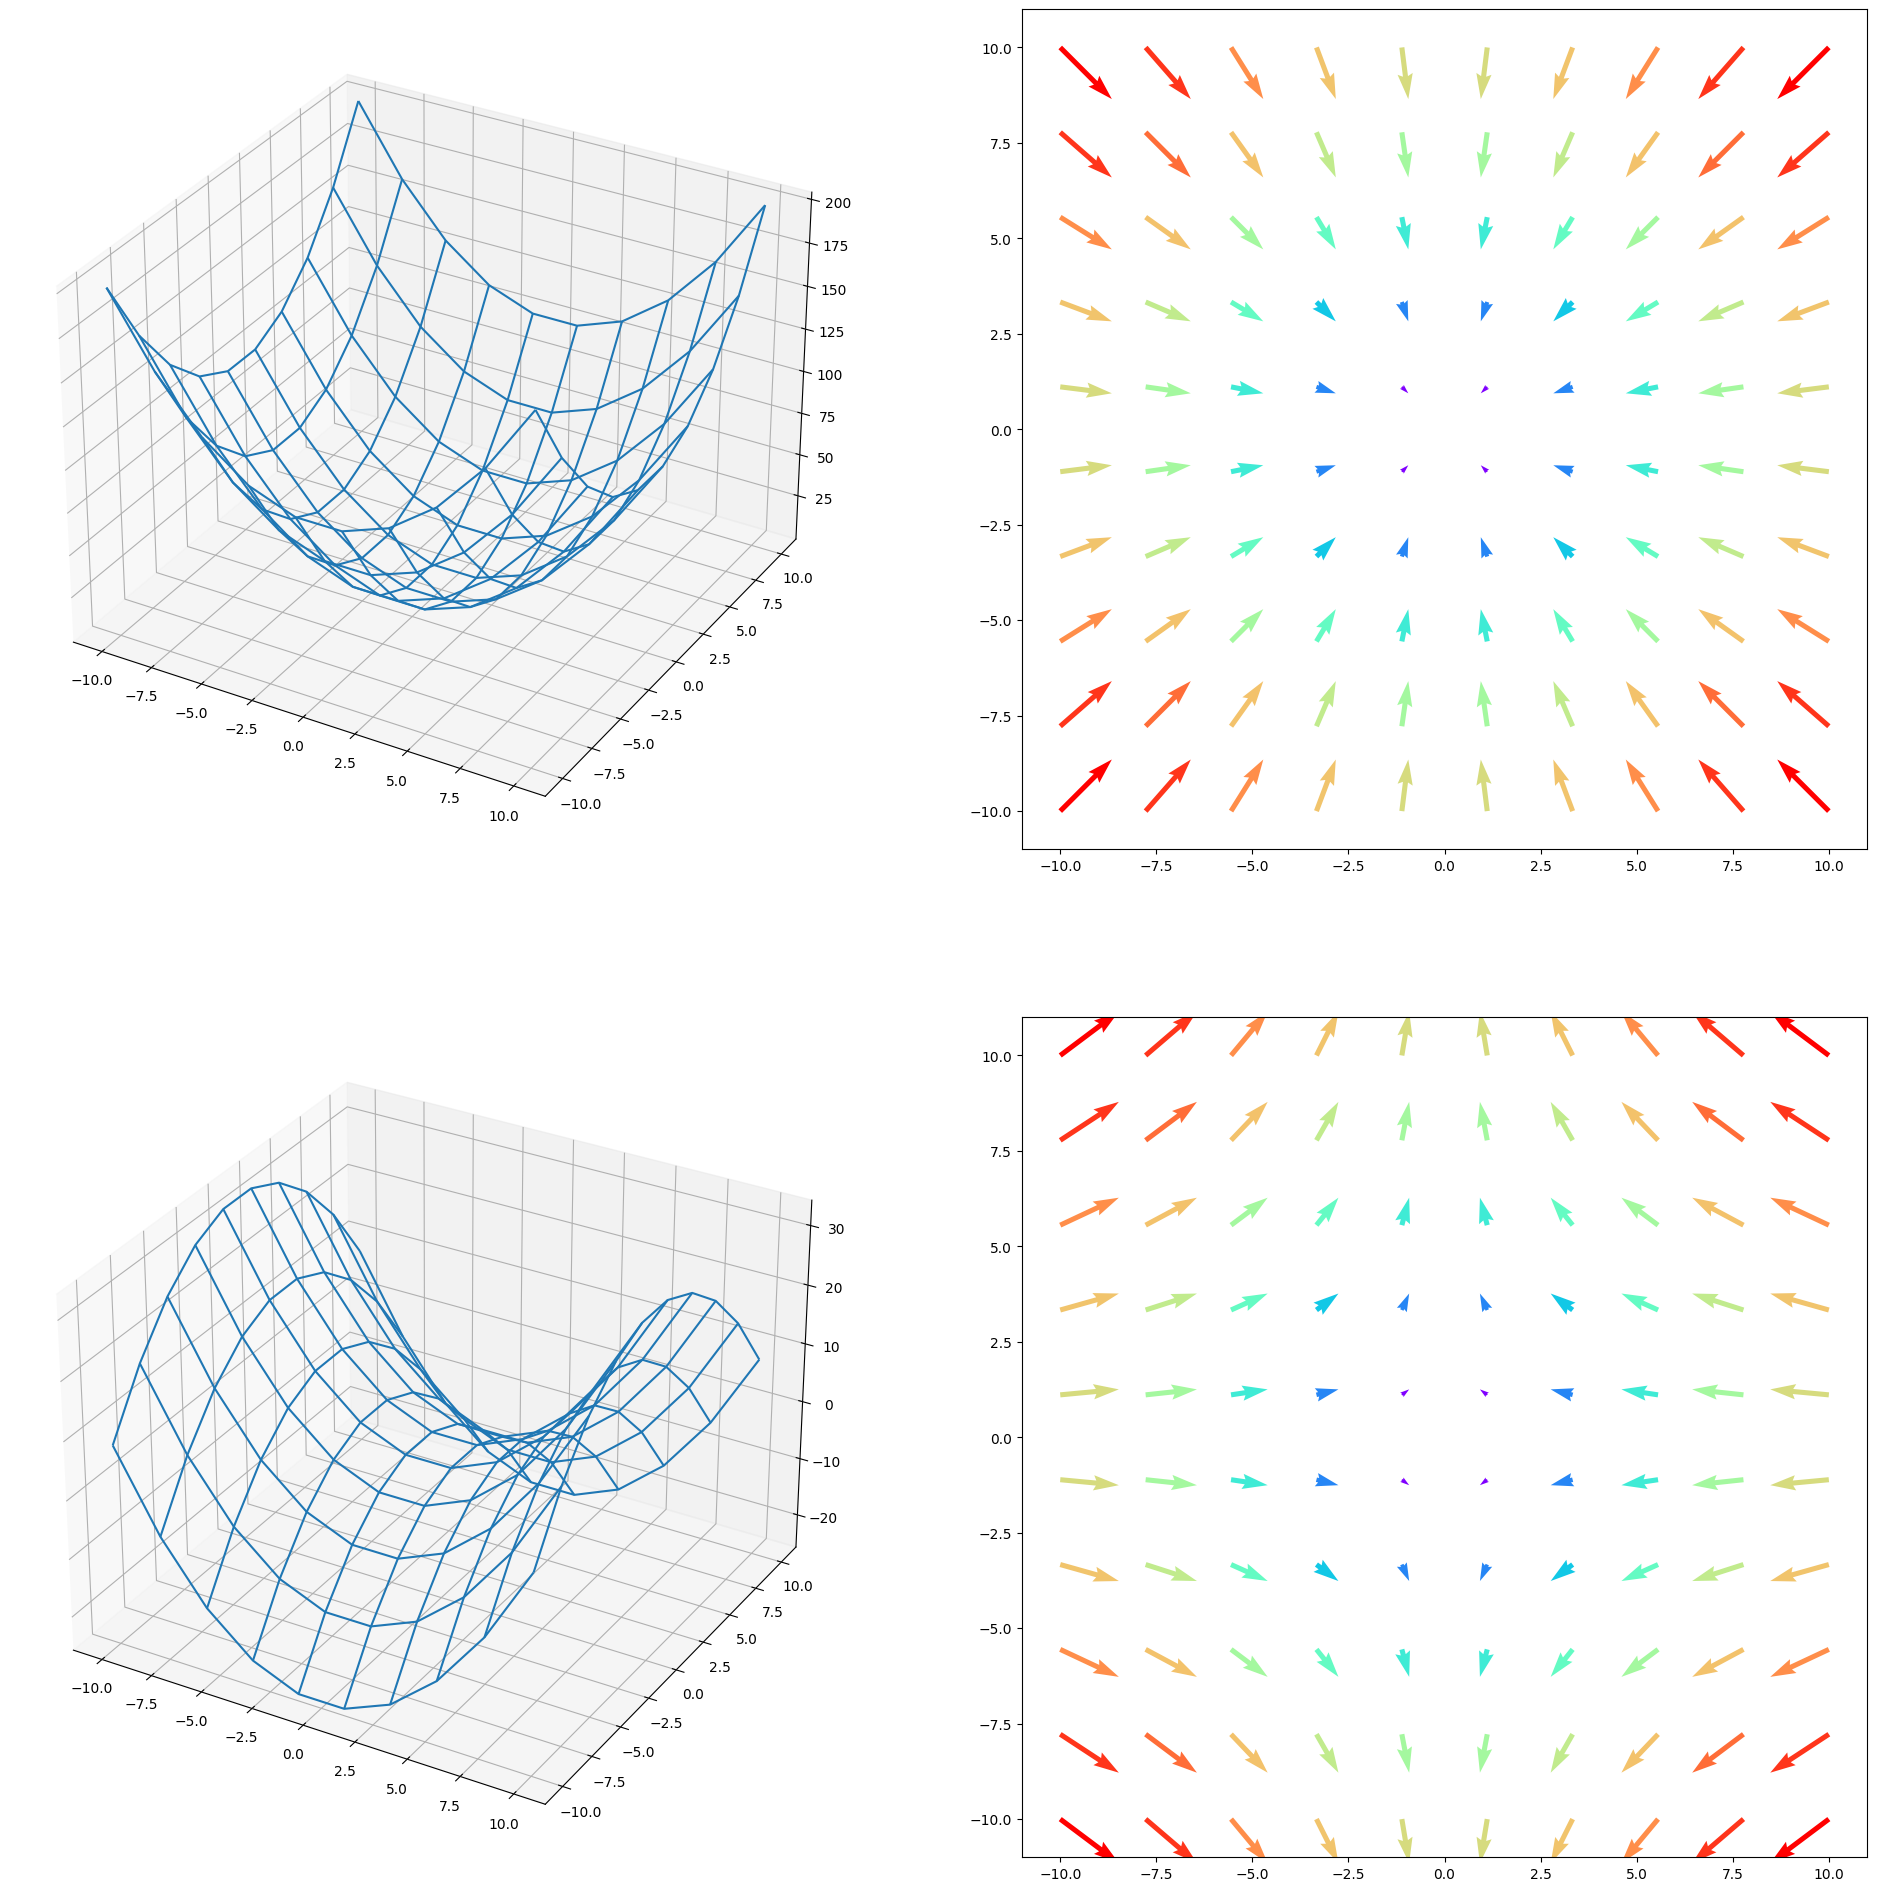

In [4]:
def function_2(x, y):
    return x ** 2 + y ** 2


fig = plt.figure(figsize=(24, 24))

X, Y = np.mgrid[-10:10:10j, -10:10:10j]

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
Z = function_2(X, Y)
ax1.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

ax2 = fig.add_subplot(2, 2, 2)
DX, DY = np.gradient(Z)
M = np.sqrt(DX ** 2 + DY ** 2)
ax2.quiver(X, Y, -DX, -DY, M, linewidth=2, cmap='rainbow')


def function_3(x, y):
    return (x ** 2) / 3 - (y ** 2) / 4


Z = function_3(X, Y)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

ax4 = fig.add_subplot(2, 2, 4)
DX, DY = np.gradient(Z)
ax4.quiver(X, Y, -DX, -DY, M, linewidth=2, cmap='rainbow')

plt.show()

### 梯度法
- 通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法（gradient method）。梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。
- 寻找最小值的梯度法称为梯度下降法（gradient descent method），寻找最大值的梯度法称为梯度上升法（gradient ascent method）。但是通过反转损失函数的符号，求最小值的问题和求最大值的问题会变成相同的问题，因此“下降”还是“上升”的差异本质上并不重要。一般来说，神经网络（深度学习）中，梯度法主要是指梯度下降法。

现在, 我们尝试用数学式来表示梯度法, 如式 (4.7) 所示。
$$
\begin{aligned}
& x_0=x_0-\eta \frac{\partial f}{\partial x_0} \\
& x_1=x_1-\eta \frac{\partial f}{\partial x_1}
\end{aligned}
$$
式 (4.7) 的 $\eta$ 表示更新量, 在神经网络的学习中, 称为学习率 (learning rate)。学习率决定在一次学习中, 应该学习多少, 以及在多大程度上更新参数。 式 (4.7) 是表示更新一次的式子, 这个步骤会反复执行。也就是说, 每一步都按式 (4.7) 更新变量的值, 通过反复执行此步骤, 逐渐减小函数值。 虽然这里只展示了有两个变量时的更新过程, 但是即便增加变量的数量, 也可以通过类似的式子(各个变量的偏导数) 进行更新。

- 实验结果表明，学习率过大的话，会发散成一个很大的值；反过来，学习率过小的话，基本上没怎么更新就结束了。
- 像学习率这样的参数称为超参数。这是一种和神经网络的参数（权重和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定。

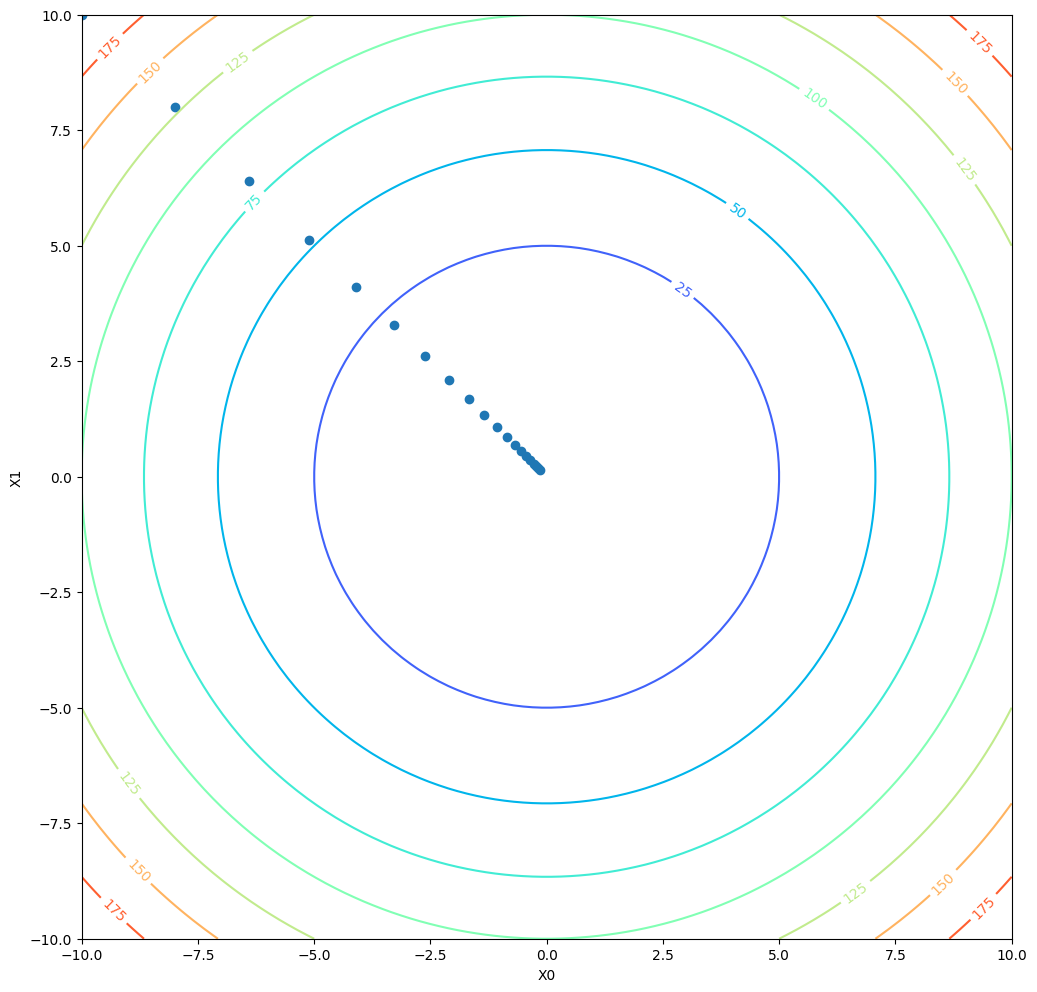

In [5]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # 生成和x形状相同的数组

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 还原值

    return grad


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_4(x):
    return x[0]**2 + x[1]**2

def function_5(x):
    return (x[0] ** 2) / 3 - (x[1] ** 2) / 4


lr = 0.1
step_num = 20

fig = plt.figure(figsize=(12, 12))
init_x = np.array([-10.0, 10.0])
x, x_history = gradient_descent(function_4, init_x, lr=lr, step_num=step_num)
plt.plot(x_history[:,0], x_history[:,1], 'o')
X, Y = np.mgrid[-10:10:100j, -10:10:100j]
Z = function_2(X,Y)
cs = plt.contour(X, Y, Z,cmap='rainbow')
plt.clabel(cs, inline=True,fontsize=10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

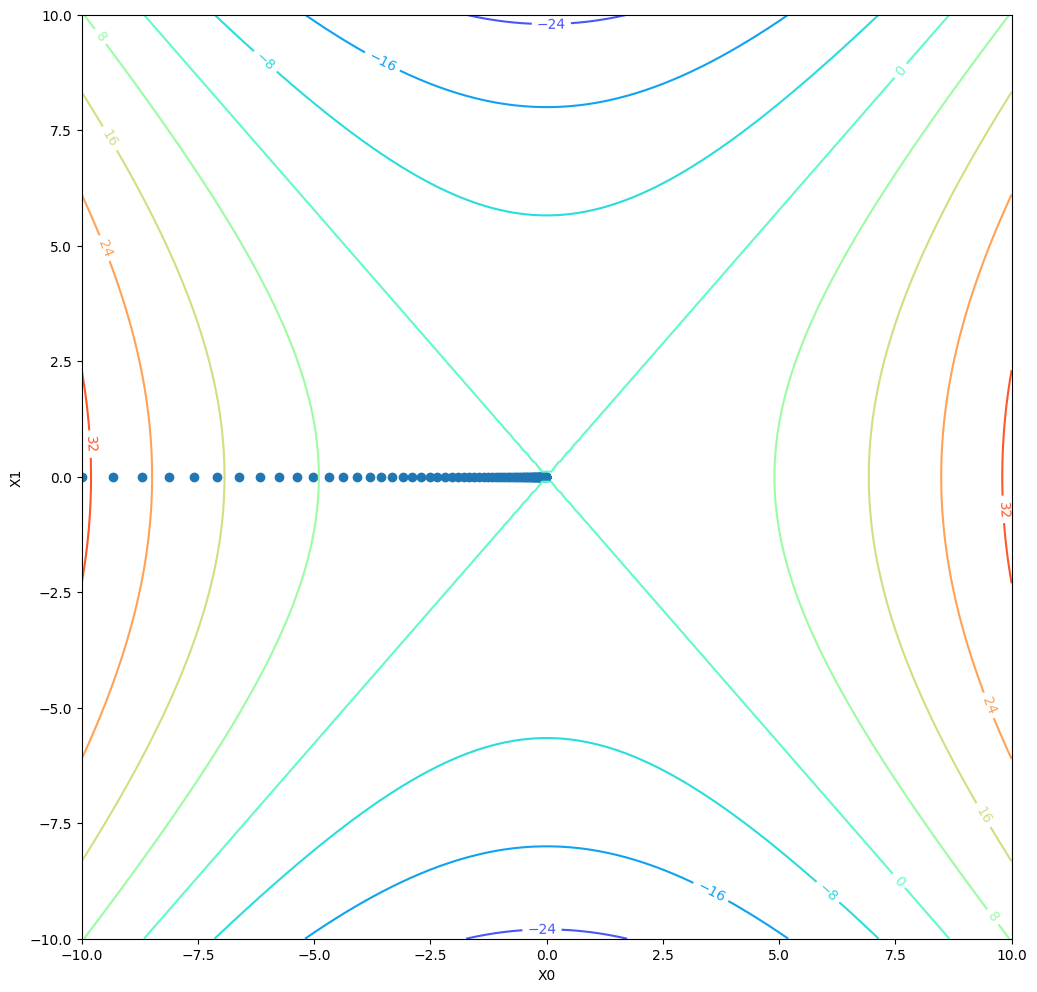

In [6]:
fig = plt.figure(figsize=(12, 12))
init_x = np.array([-10.0, 0.0])
step_num = 100
x, x_history = gradient_descent(function_5, init_x, lr=lr, step_num=step_num)
plt.plot(x_history[:,0], x_history[:,1], 'o')
X, Y = np.mgrid[-10:10:100j, -10:10:100j]
Z = function_3(X,Y)
cs = plt.contour(X, Y, Z,cmap='rainbow')
plt.clabel(cs, inline=True,fontsize=10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 神经网络的梯度
神经网络的学习也要求梯度。这里所说的梯度是指损失函数关于权重参 数的梯度。比如, 有一个只有一个形状为 $2 \times 3$ 的权重 $\boldsymbol{W}$ 的神经网络, 损失 函数用 $L$ 表示。此时, 梯度可以用 $\frac{\partial L}{\partial W}$ 表示。用数学式表示的话, 如下所示。
$$
\begin{aligned}
\boldsymbol{W} & =\left(\begin{array}{lll}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{array}\right) \\
\frac{\partial L}{\partial \boldsymbol{W}} & =\left(\begin{array}{lll}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{array}\right)
\end{aligned}
$$
$\frac{\partial L}{\partial W}$ 的元素由各个元素关于 $\boldsymbol{W}$ 的偏导数构成。比如, 第1行第 1 列的元素 $\frac{\partial L}{\partial w_{11}}$ 表示当 $w_{11}$ 稍微变化时, 损失函数 $L$ 会发生多大变化。这里的重点是, $\frac{\partial L}{\partial \boldsymbol{W}}$ 的形状和 $\boldsymbol{W}$ 相同。实际上, 式 (4.8) 中的 $\boldsymbol{W}$ 和 $\frac{\partial L}{\partial \boldsymbol{W}}$ 都是 $2 \times 3$ 的形状。

## 学习算法的实现

In [ ]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)